[Answer]: ((S3 ⊕ S3) ≀ C3)


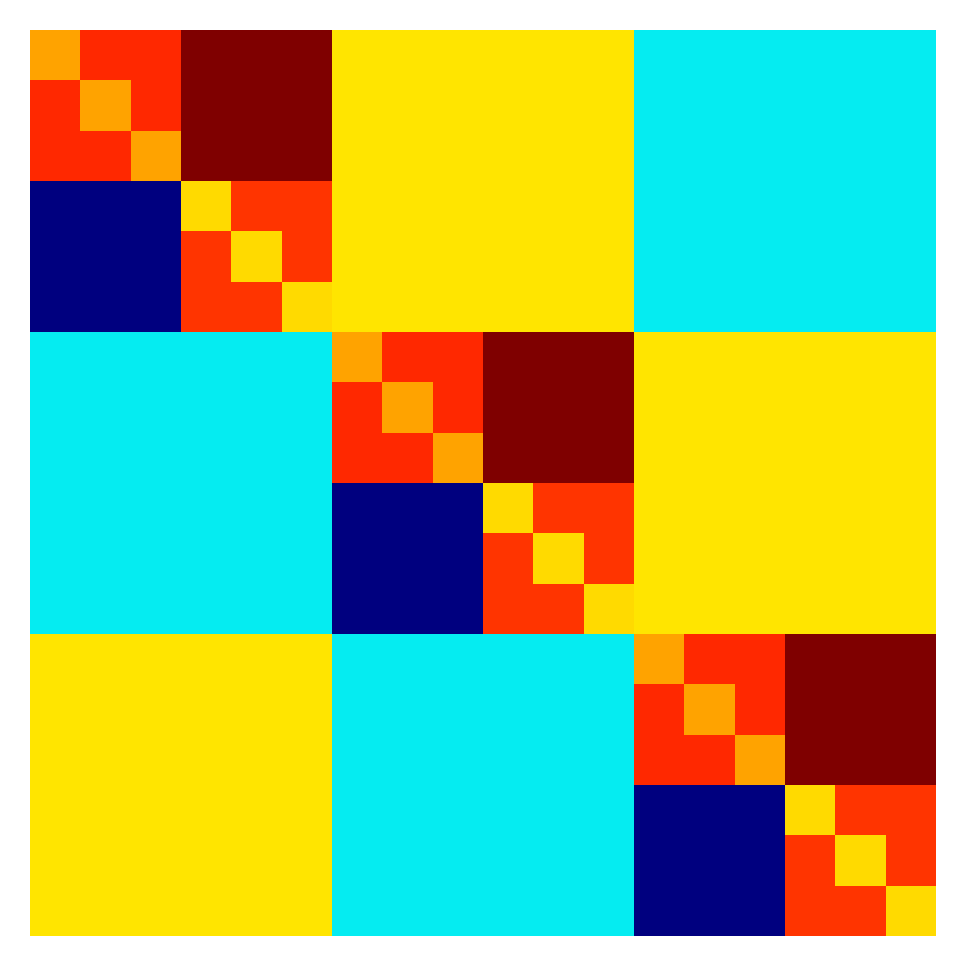

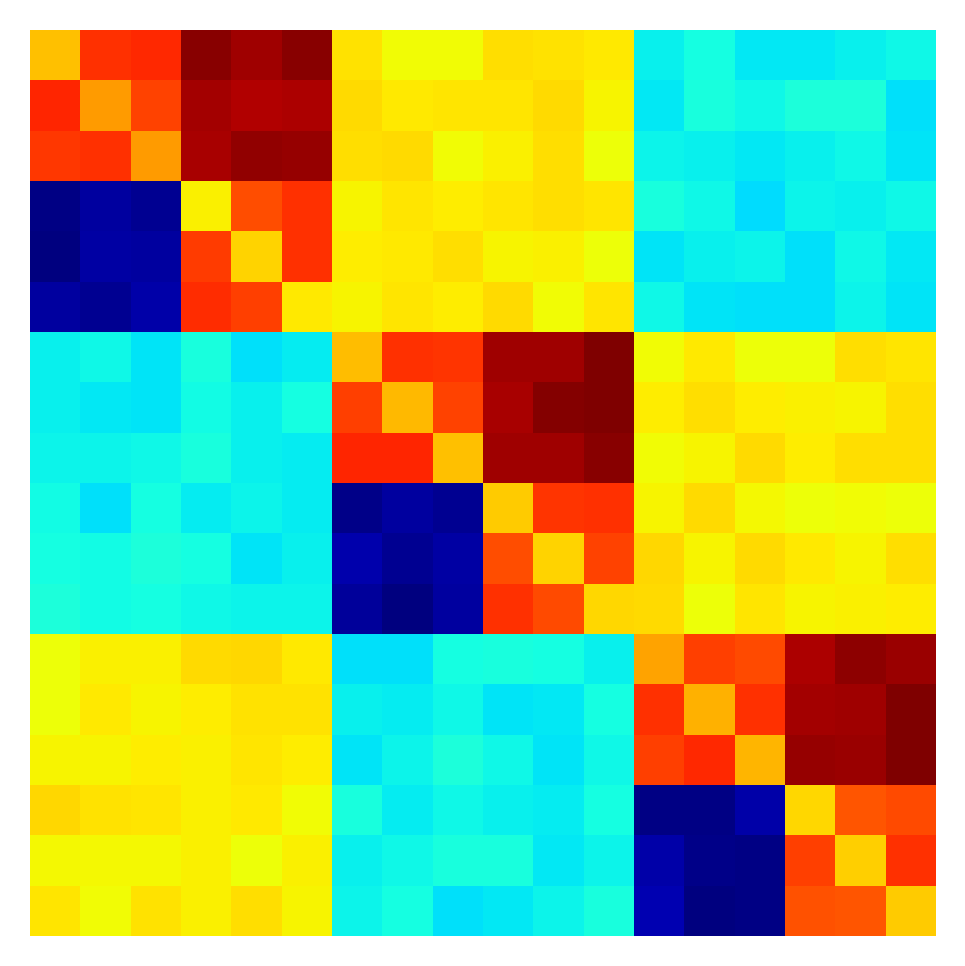

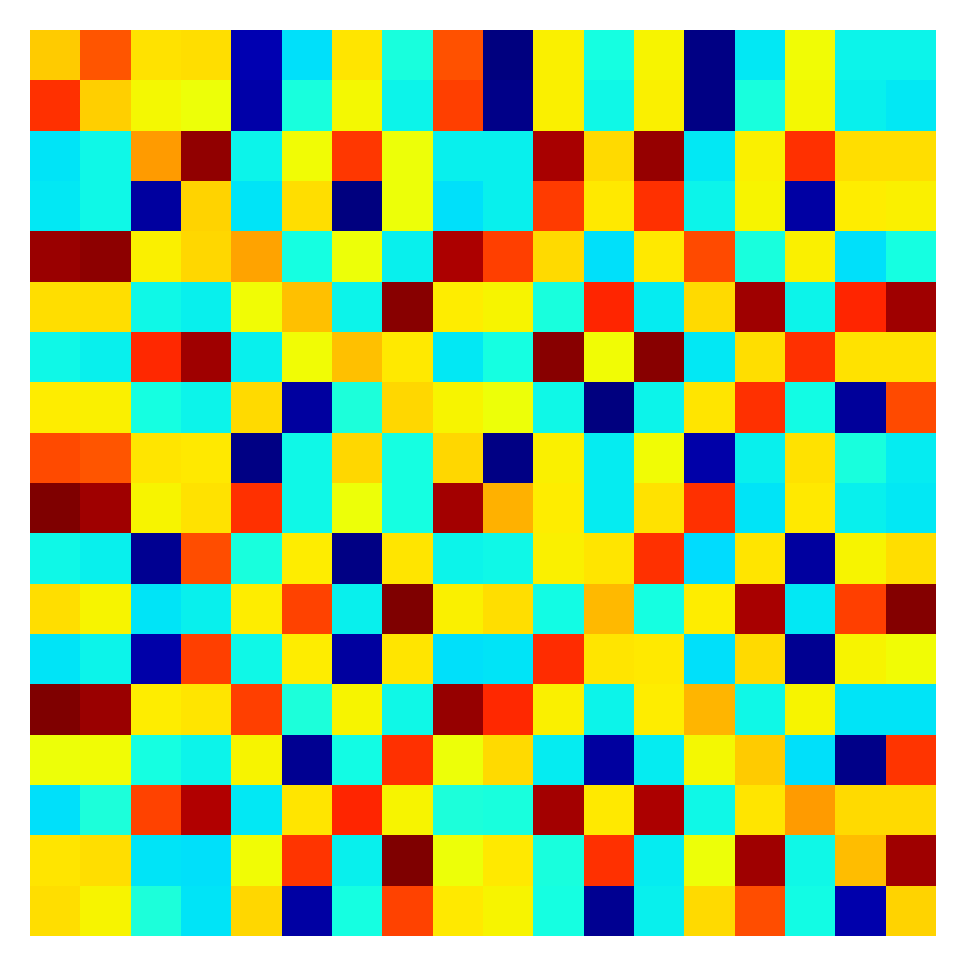

(S3 ≀ (I2 ≀ C3))


In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from utils.logger import *
from utils.draw import *
from utils.grammar import *
from utils import symfind
from utils import symfind_test
import satnet
import symsatnet


if __name__ == "__main__":
    m, n = 3, 5
    Cm = Cyclic(dim = m)
    Cn = Cyclic(dim = n)
    Sm = Perm(dim = m)
    Sn = Perm(dim = n)
 
    G = Wreath(Sum(Sm, Sm), Cm)
    D = torch.randn(G.dim, G.dim)
    D = G.proj(D)
    torch.save(D, "truth.pt")
    draw(D, save = "truth.pt")

    noise = torch.rand(D.shape)
    noise_ratio = 0.05

    D += noise * (torch.std(D) / torch.std(noise)) * noise_ratio
    torch.save(D, "noise.pt")
    draw(D, save = "noise")
    
    D = shuffle(D, 60)
    torch.save(D, "shuffle.pt")
    draw(D, save = "shuffle")

    print(symfind.sym_find(D, rtol = 0.05))